# Proje Başlangıcı: Gerekli Kütüphanelerin Yüklenmesi

Bu bölümde, projemizde kullanacağımız **Python kütüphanelerini** içe aktarıyoruz.

##  Veri Analizi ve Manipülasyonu İçin Kütüphaneler
- **pandas**: Veri işleme ve analiz için.
- **numpy**: Sayısal işlemler ve matris manipülasyonu için.

##  Görselleştirme İçin Kütüphaneler
- **matplotlib.pyplot**: Grafik çizimi için.
- **seaborn**: Gelişmiş istatistiksel görselleştirme için.

##  Web Üzerinden Veri Çekme Kütüphaneleri
- **yfinance**: Finansal verileri **Yahoo Finance API** üzerinden almak için.
- **requests**: Web’den veri çekmek için.
- **BeautifulSoup**: Web sayfalarındaki verileri ayrıştırmak için.

##  Makine Öğrenimi İçin Kütüphaneler
- **sklearn.preprocessing.StandardScaler**: Verileri normalize etmek için.
- **sklearn.model_selection.train_test_split**: Veriyi eğitim ve test kümelerine ayırmak için.
- **sklearn.ensemble.RandomForestClassifier**: Rastgele orman sınıflandırıcısı modeli için.
- **sklearn.feature_selection.RFE**: Özellik seçimi için *Recursive Feature Elimination* (RFE) yöntemi.
- **sklearn.metrics.classification_report, accuracy_score**: Model başarı metrikleri.

##  Alternatif Makine Öğrenimi Modeli
- **CatBoostClassifier**: Kategorik verilerle daha iyi çalışan bir **gradient boosting** algoritması.

##  Zaman Serisi Özellik Çıkarımı İçin Kütüphaneler
- **tsfresh.extract_features**: Zaman serisi verilerinden otomatik özellik çıkarmak için.
- **tsfresh.utilities.dataframe_functions.impute**: Eksik verileri doldurmak için.
- **tsfresh.feature_extraction**: Özellik çıkarma için çeşitli fonksiyonlar.

---


In [1]:
# To get multi output in jupyternotebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import yfinance
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import  RFE
from sklearn.metrics import  classification_report ,accuracy_score
from catboost import CatBoostClassifier
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
import tsfresh.feature_extraction 

#  Web'den Veri Çekme ve İşleme Fonksiyonları

Bu bölümde, **hisse senedi sektörleri** ve **sektör bazlı hisse senedi verilerini** çekmek için fonksiyonlar tanımlıyoruz. Web scraping kullanarak verileri **Stock Analysis** web sitesinden alıyoruz.

---

##  Hisse Senedi Sektörlerini Getirme

Bu fonksiyon, **hisse senedi sektörlerinin listesini** almak için kullanılır. 

###  İşleyiş:
- **Stock Analysis** sitesinden sektör listesinin bulunduğu sayfaya **HTTP isteği** gönderilir.
- Eğer sayfa başarıyla yüklenirse, **HTML içeriği parse edilir** ve sayfada bulunan **ilk tablo** veri çerçevesi formatına çevrilir.
- Eğer sayfa yüklenemezse, **hata mesajı** döndürülür.

**Döndürülen veri:** Pandas DataFrame formatında sektör isimleri.

---

##  Belirtilen Sektördeki Hisseleri Getirme

Bu fonksiyon, **belirtilen sektörde bulunan hisse senetlerini** almak için kullanılır.

###  İşleyiş:
- **Stock Analysis** sitesinden belirtilen sektöre ait hisse senetlerinin bulunduğu sayfaya **HTTP isteği** gönderilir.
- Sayfa başarıyla yüklenirse, **HTML içeriği parse edilir** ve tablo içeriği **veri çerçevesine** çevrilir.
- Gereksiz **"No."** sütunu kaldırılarak daha temiz bir veri seti elde edilir.
- Eğer hata oluşursa, **uyarı mesajı** görüntülenir.

**Döndürülen veri:** Pandas DataFrame formatında sektör bazlı hisse senedi listesi.

---

##  Belirtilen Sayıda Hisse Sembolü Seçme

Bu fonksiyon, bir sektöre ait **hisse senedi sembollerini (ticker symbols)** almak için kullanılır.

###  İşleyiş:
- **CSV dosyasından**, belirtilen sektöre ait **hisse sembolleri** okunur.
- **Eksik veriler temizlenir**, gereksiz boşluklar kaldırılır ve semboller **string formatına** çevrilir.
- Kullanıcının belirttiği **ilk N sembol** alınarak bir liste döndürülür.

**Döndürülen veri:** Belirtilen sektörden seçilen **N adet** hisse senedi sembolü listesi.

---

##  Hisse Senedi Fiyatlarını İndirme

Bu fonksiyon, **Yahoo Finance** üzerinden belirtilen hisselerin fiyatlarını indirmek için kullanılır.

###  İşleyiş:
- **Yahoo Finance API** kullanılarak, verilen hisse senedi sembollerine karşılık gelen fiyat verileri indirilir.
- Sadece **kapanış fiyatları (Close Price)** seçilir ve veri çerçevesine eklenir.
- Sütun isimleri **standart hale getirilir**.

**Döndürülen veri:** Hisse senetlerine ait tarihsel kapanış fiyatları içeren bir veri çerçevesi.




In [2]:
def fetch_sectors_names():
    url = "https://stockanalysis.com/stocks/industry/sectors/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df = pd.read_html(str(soup.find_all("table")))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")
        return None
    return df

def fetch_data(sector):
    url = f"https://stockanalysis.com/stocks/sector/{sector}/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df = pd.read_html(str(soup.find_all("table")))[0]
        df.drop(columns=['No.'], inplace=True)
    else:
        print(f"Error: Failed to fetch data from page {url}")
        return None
    return df

def select_tickers_sybmol(sectorname,symbolcount):
    df=pd.read_csv(f"./stock_sectors/{sectorname}.csv")["Symbol"].dropna().astype(str).str.strip().tolist()[:symbolcount]
    return df


def download_stock_prices_yfinance(ticker_list,stardate):
    data = yfinance.download(ticker_list, start=stardate)
    data_close=data[['Close']]
    data_close.columns = ['_'.join(col) for col in data_close.columns]
    return data_close

#  Veri Ön İşleme ve Özellik Mühendisliği Fonksiyonları

Bu bölümde, **veri ön işleme ve özellik çıkarımı** için gerekli fonksiyonları oluşturuyoruz. 
Bu adımlar, veri setimizi makine öğrenimi algoritmaları için daha anlamlı hale getirmeyi amaçlamaktadır.

---

##  Basit Hareketli Ortalama (SMA) Hesaplama

Bu fonksiyon, **hisse senedi fiyatları için hareketli ortalama (SMA - Simple Moving Average)** hesaplar.

### İşleyiş:
- Verilere **hareketli ortalama (rolling mean)** uygulanır.
- Kullanıcı tarafından belirlenen pencere boyutuna (**windowNumber**, varsayılan 14) göre hesaplama yapılır.

**Döndürülen veri:** Hareketli ortalama uygulanmış veri çerçevesi.

---

##  Log Dönüşümü Uygulama

Bu fonksiyon, **hisse senedi kapanış fiyatlarına log dönüşümü** uygular.

###  İşleyiş:
- Her sütunun doğal logaritması (**ln**) hesaplanır.
- Yeni sütunlar **"HisseSenedi_Log_"** ön ekiyle yeniden adlandırılır.
- Sadece **log dönüşümü uygulanmış kapanış fiyatları** filtrelenerek yeni bir veri çerçevesi oluşturulur.

**Döndürülen veri:** Log dönüşümü uygulanmış hisse senedi fiyatları.

---

##  Standart Ölçekleme (Standard Scaler)

Bu fonksiyon, **verileri normalize etmek ve ölçeklemek** için kullanılır.

###  İşleyiş:
- **StandardScaler()** ile veriler **ortalaması 0, standart sapması 1 olacak şekilde** ölçeklenir.
- Ölçeklenmiş veriler, **pandas DataFrame** formatında döndürülür.
- **Eksik sütunlar kaldırılır**, verinin temiz olması sağlanır.

**Döndürülen veri:** Standardize edilmiş veri çerçevesi.

---

##  Log Dönüşümü Sonrası Görselleştirme

Bu fonksiyon, **log dönüşümü uygulanmış hisse senedi fiyatlarını görselleştirmek** için kullanılır.

###  İşleyiş:
- İlk **5 hisse senedi** için **zaman serisi grafiği** oluşturulur.
- **Matplotlib ve Seaborn** kullanılarak log dönüşümü sonrası fiyat değişimleri gösterilir.
- Grafikte **tarih (x ekseni)** ve **log kapanış fiyatı (y ekseni)** etiketlenir.

**Çıktı:** Log dönüşümü sonrası fiyat değişimlerini gösteren çizgi grafiği.

---

##  TSFresh İçin Veri Hazırlama

Bu fonksiyon, **TSFresh kütüphanesi ile zaman serisi özellik çıkarımı yapabilmek için veriyi uygun formata getirir.**

###  İşleyiş:
- **Zaman damgası (timestamp)** indeksi olarak ayarlanır.
- **Melt işlemi** ile veri uzun formatlı hale getirilir (her bir hisse için zaman serisi oluşturulur).
- **Eksik veriler temizlenir**.

**Döndürülen veri:** TSFresh için uygun hale getirilmiş uzun formatlı veri çerçevesi.

---


In [3]:
def moving_average_df_SMA(df,windowNumber=14):
    dfreturn=df.rolling(windowNumber).mean()
    return dfreturn

def log_transform(df):
    for col in df:
         df[f"HisseSenedi_Log_{col}"] = np.log(df[col])
    df_log = df.filter(like="HisseSenedi_Log_Close_")
    df_log.columns = df_log.columns.str.replace("HisseSenedi_Log_Close_", "", regex=True)
    return df_log

def scale_data_standard(df):
    scaler=StandardScaler()
    df_scaled=pd.DataFrame(scaler.fit_transform(df),columns=df.columns,index=df.index)
    df_scaled = df_scaled.dropna(axis=1, how="all")
    df_scaled.info()
    return df_scaled

def visualize_log_df(df):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df.iloc[:, :5])  
    plt.title("📈 Hisse Senedi Fiyatlarının Log Dönüşümü ile Zaman Serisi Grafiği")
    plt.xlabel("Tarih")
    plt.ylabel("Log Kapanış Fiyatı")
    plt.show()
    return df


def preparation_for_tsfresh(df):
    df=df.copy()
    df.index.name="timestamp"
    df_prep=df.reset_index().melt(id_vars=["timestamp"],var_name="station",value_name="value")
    df_prep=df_prep.dropna(subset=["value"])
    print("Tshfreh İçin Hazırlık TAMAMLANDI örnek : \n",df_prep.head(5))
    return df_prep

#  Özellik Çıkarımı: TSFresh Kullanımı

Bu bölümde, **TSFresh** kütüphanesi kullanılarak zaman serisi verilerinden **otomatik özellik çıkarımı** yapılmaktadır.

---

## TSFresh ile Özellik Çıkarımı

Bu fonksiyon, **TSFresh kütüphanesi** ile zaman serisi verilerinden anlamlı özellikler çıkarmak için kullanılır.

###  İşleyiş:
- `extract_features()` fonksiyonu ile:
  - **"station"** sütunu üzerinden her hisse senedi için ayrı özellikler üretilir.
  - **"timestamp"** sütunu sıralama için kullanılır.
  - **"value"** sütunu, hesaplamalar için temel değer olarak alınır.
  - Varsayılan olarak **EfficientFCParameters()** kullanılarak en verimli özellikler çıkarılır.
  
- **Eksik veriler** `impute()` fonksiyonu ile doldurulur.

- Eğer veri çerçevesinde `"sector"` sütunu varsa:
  - **Sektör bilgisi korunarak** özellik çerçevesine eklenir.

**Döndürülen veri:** Özellik mühendisliği uygulanmış, zaman serisinden türetilmiş yeni bir veri çerçevesi.

---



In [4]:
def apply_tsfresh(df):
    features=extract_features(df,column_id="station",column_sort="timestamp",column_value="value",default_fc_parameters=tsfresh.feature_extraction.EfficientFCParameters())

    features=impute(features)
    if "sector" in df.columns:
        features["sector"] = df.groupby("station")["sector"].first()


    return features

#  Hisse Senedi Sektörlerinin Çekilmesi

Bu adımda, **bütün hisse senedi sektörlerinin listesini almak** için daha önce tanımladığımız `fetch_sectors_names()` fonksiyonunu kullanıyoruz.

###  İşleyiş:
- `fetch_sectors_names()` fonksiyonu çağrılarak **Stock Analysis** web sitesinden sektör verileri çekilir.
- Eğer veri başarıyla alınırsa, `sectors` değişkenine atanır.
- Bu değişken, **tüm sektörlerin yer aldığı bir veri çerçevesi (DataFrame)** içerir.

**Çıktı:** Hisse senedi sektörlerinin listesi.



In [5]:
sectors = fetch_sectors_names()
sectors

C:\Users\Harun\AppData\Local\Temp\ipykernel_8836\1466198958.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(soup.find_all("table")))[0]


,Sector Name,Stocks,Market Cap,Div. Yield,PE Ratio,Profit Margin,1D Change,1Y Change
0,Financials,1269,11.82T,0.17%,15.95,19.77%,0.08%,34.55%
1,Healthcare,1158,"8,051.98B",0.50%,60.58,3.15%,-0.02%,11.39%
2,Technology,770,21.30T,0.49%,45.94,14.44%,1.56%,46.59%
3,Industrials,657,"5,895.71B",1.19%,29.21,7.28%,0.18%,25.57%
4,Consumer Discretionary,561,"9,022.93B",0.74%,31.73,6.20%,1.67%,42.61%
5,Materials,266,"2,028.74B",1.70%,28.83,6.02%,1.25%,11.53%
6,Real Estate,263,"1,654.59B",3.81%,49.57,9.35%,0.23%,11.16%
7,Energy,252,"3,665.60B",3.11%,13.25,8.26%,1.91%,13.31%
8,Communication Services,245,"6,597.03B",1.48%,34.46,11.48%,1.78%,43.42%
9,Consumer Staples,243,"4,187.55B",1.53%,28.75,5.00%,-0.26%,24.13%


#  Hisse Senedi Verilerinin Çekilmesi ve Kaydedilmesi

Bu adımda, **belirtilen sektörlerde yer alan hisse senetlerinin verileri** çekilerek CSV formatında kaydedilmektedir.

---

##  Sektör Listesi Tanımlama

Öncelikle, **çekilmesi gereken sektörleri içeren bir liste** oluşturulur:

- `energy` (Enerji)
- `financials` (Finans)
- `healthcare` (Sağlık)
- `technology` (Teknoloji)
- `utilities` (Hizmetler)
- `real-estate` (Gayrimenkul)
- `materials` (Hammadde)
- `industrials` (Sanayi)
- `consumer-staples` (Temel Tüketici Ürünleri)
- `consumer-discretionary` (Lüks Tüketici Ürünleri)
- `communication-services` (İletişim Hizmetleri)

---

##  Veri Çekme ve Kaydetme Süreci

Her sektör için aşağıdaki işlemler gerçekleştirilir:

1. **`fetch_data(sector)`** fonksiyonu çağrılarak ilgili sektörün hisse senedi verileri çekilir.
2. Eğer veri başarıyla alınmışsa:
   - **CSV formatında kaydedilir** (`./stock_sectors/{sector}.csv`).
   - Kullanıcıya **hangi sektör verisinin kaydedildiği** ekrana yazdırılır.
3. **Tüm sektörler tamamlandığında**, işlemin başarıyla tamamlandığı mesajı gösterilir.

**Çıktı:** Her sektör için oluşturulmuş CSV dosyaları.

---

**Bütün sektörlerin hisse senedi verileri başarıyla çekildi ve kaydedildi!** 


In [8]:

sectors_list = [
    "energy", "financials", "healthcare", "technology", "utilities", 
    "real-estate", "materials", "industrials", "consumer-staples", 
    "consumer-discretionary", "communication-services"
]


for sector in sectors_list:
    data = fetch_data(sector)
    if data is not None:
        data.to_csv(f'./stock_sectors/{sector}.csv', index=False)
        print(f"{sector}.csv kaydedildi!")

print("Tüm sektör verileri başarıyla çekildi ve kaydedildi!")


C:\Users\Harun\AppData\Local\Temp\ipykernel_8836\1466198958.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(soup.find_all("table")))[0]


energy.csv kaydedildi!


C:\Users\Harun\AppData\Local\Temp\ipykernel_8836\1466198958.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(soup.find_all("table")))[0]


financials.csv kaydedildi!


C:\Users\Harun\AppData\Local\Temp\ipykernel_8836\1466198958.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(soup.find_all("table")))[0]


healthcare.csv kaydedildi!


C:\Users\Harun\AppData\Local\Temp\ipykernel_8836\1466198958.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(soup.find_all("table")))[0]


technology.csv kaydedildi!


C:\Users\Harun\AppData\Local\Temp\ipykernel_8836\1466198958.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(soup.find_all("table")))[0]


utilities.csv kaydedildi!


C:\Users\Harun\AppData\Local\Temp\ipykernel_8836\1466198958.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(soup.find_all("table")))[0]


real-estate.csv kaydedildi!


C:\Users\Harun\AppData\Local\Temp\ipykernel_8836\1466198958.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(soup.find_all("table")))[0]


materials.csv kaydedildi!


C:\Users\Harun\AppData\Local\Temp\ipykernel_8836\1466198958.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(soup.find_all("table")))[0]


industrials.csv kaydedildi!


C:\Users\Harun\AppData\Local\Temp\ipykernel_8836\1466198958.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(soup.find_all("table")))[0]


consumer-staples.csv kaydedildi!


C:\Users\Harun\AppData\Local\Temp\ipykernel_8836\1466198958.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(soup.find_all("table")))[0]


consumer-discretionary.csv kaydedildi!
communication-services.csv kaydedildi!
Tüm sektör verileri başarıyla çekildi ve kaydedildi!


C:\Users\Harun\AppData\Local\Temp\ipykernel_8836\1466198958.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(soup.find_all("table")))[0]


#  **Veri İşleme ve Özellik Çıkarma İçin Pipeline Yapısı**

Bu adımda, veri ön işleme ve özellik çıkarım sürecini **otomatikleştirmek** için **Scikit-learn Pipeline** yapısı oluşturulmaktadır.

---

##  **Pipeline Bileşenleri ve İşleyişi**

Pipeline, aşağıdaki adımları belirlenen sırayla çalıştırarak veriyi işleyip modelleme için hazır hale getirir:

1. **SMA (Simple Moving Average - Basit Hareketli Ortalama)**
   - `moving_average_df_SMA` fonksiyonu kullanılarak hisse senedi fiyatları için **hareketli ortalama** hesaplanır.

2. **Log Dönüşümü**
   - `log_transform` fonksiyonu ile fiyat verileri **logaritmik dönüşüme** tabi tutulur.

3. **Ölçeklendirme (StandardScaler)**
   - `scale_data_standard` fonksiyonu ile veriler **standart ölçekleme** yöntemiyle normalize edilir.

4. **Görselleştirme**
   - `visualize_log_df` fonksiyonu ile **ilk 5 hisse senedinin zaman serisi grafiği** çizilir.

5. **TSFresh için Veri Hazırlığı**
   - `preparation_for_tsfresh` fonksiyonu ile veri **TSFresh için uygun formata getirilir**.

6. **TSFresh Özellik Çıkarma**
   - `apply_tsfresh` fonksiyonu ile **zaman serisi özellikleri otomatik olarak çıkarılır**.

---

##  **Pipeline Kullanımı**

- **FunctionTransformer** ile her fonksiyon **Pipeline içerisine modüler bir şekilde** entegre edilmiştir.
- **Pipeline** sırayla çalışarak veriyi **tam otomatik şekilde işler ve hazır hale getirir.**
- `validate=False` parametresi ile **özelleştirilmiş fonksiyonların Pipeline içinde sorunsuz çalışması sağlanmıştır.**

**Çıktı:** 
- Veriyi adım adım işleyerek **modellemeye uygun hale getiren bir otomatik süreç.**

---

**Bu Pipeline, veri işleme sürecini hızlandırarak hata payını azaltır ve modüler bir yapı sağlar!** 

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

pipeline = Pipeline([
    ("sma", FunctionTransformer(moving_average_df_SMA, validate=False)),  
    ("log_transform", FunctionTransformer(log_transform, validate=False)),  
    ("scale", FunctionTransformer(scale_data_standard, validate=False)),  
    ("visualize", FunctionTransformer(visualize_log_df, validate=False)),
    ("tsfresh_prep", FunctionTransformer(preparation_for_tsfresh, validate=False)),  
    ("tsfresh", FunctionTransformer(apply_tsfresh, validate=False)),  
])


#  **Hisse Senedi Sembollerinin Seçilmesi**

Bu adımda, **üç farklı sektörden belirli sayıda hisse senedi sembolü seçerek analiz için birleştiriyoruz.** 

---

##  **Her Sektörden 500 Hisse Senedi Seçimi**
Aşağıdaki sektörlerden **500'er adet hisse senedi sembolü** seçilmektedir:

- **Finans (financials)**
- **Sağlık (healthcare)**
- **Teknoloji (technology)**

Her sektör için **`select_tickers_sybmol()`** fonksiyonu kullanılarak **CSV dosyasından ilgili sektörün hisse senedi sembolleri** okunur.

---

##  **Tüm Hisselerin Birleştirilmesi**
- Seçilen hisse senetleri **tek bir liste içinde birleştirilir**.
- **Üç sektörden gelen tüm semboller** `ticker_list` değişkeninde saklanır.

---

##  **Seçilen Hisse Sayılarının Kontrolü**
Son olarak, **her sektörden kaç adet hisse seçildiği ekrana yazdırılır** ve toplam hisse sayısı gösterilir.

---

**Bu aşamadan sonra seçilen hisseler için fiyat verileri indirilecektir!** 

In [10]:
import pandas as pd

financials_tickers = select_tickers_sybmol("financials",500)
healthcare_tickers = select_tickers_sybmol("healthcare",500)
technology_tickers = select_tickers_sybmol("technology",500)

ticker_list = financials_tickers + healthcare_tickers + technology_tickers


print(f"Finans sektöründen {len(financials_tickers)} hisse alındı.")
print(f"Sağlık sektöründen {len(healthcare_tickers)} hisse alındı.")
print(f"Teknoloji sektöründen {len(technology_tickers)} hisse alındı.")
print(f"Toplam {len(ticker_list)} hisse indirilecek.")

Finans sektöründen 500 hisse alındı.
Sağlık sektöründen 500 hisse alındı.
Teknoloji sektöründen 500 hisse alındı.
Toplam 1500 hisse indirilecek.


#  **Hisse Senedi Kapanış Fiyatlarının İndirilmesi ve Kaydedilmesi**

Bu adımda, **seçilen hisse senetlerine ait fiyat verileri** **Yahoo Finance API** kullanılarak çekilir ve CSV formatında kaydedilir.

---

##  **Hisse Senedi Fiyatlarını İndirme**
- `download_stock_prices_yfinance()` fonksiyonu çağrılarak, **belirlenen başlangıç tarihi** (`2005-01-01`) itibarıyla tüm hisse senetleri için **tarihsel kapanış fiyatları** çekilir.
- İndirilen veriler **`data_close_for_model`** değişkenine atanır.

---

##  **Verinin Kaydedilmesi**
- **İndirilen kapanış fiyatları**, `data_close_for_model.csv` dosyasına kaydedilir.
- Kullanıcıya **verinin başarıyla kaydedildiğine dair** bilgi mesajı gösterilir.

**Kaydedilen dosya yolu:** `./data/data_close_for_model.csv`

---

##  **Çıktı**
- **Seçilen hisse senetlerinin zaman serisi kapanış fiyatları** içeren bir **veri çerçevesi (DataFrame)**.
- Bu veri, ilerleyen aşamalarda **makine öğrenimi modelleri için girdi olarak kullanılacaktır**.

---

**Fiyat verileri başarıyla indirildi ve kaydedildi!** 

In [11]:
data_close_for_model=download_stock_prices_yfinance(ticker_list,stardate='2005-01-01')
data_close_for_model.to_csv(f'./data/data_close_for_model.csv')
print(f"data_close_for_model.csv kaydedildi!")
data_close_for_model

[*********************100%***********************]  1499 of 1500 completed

41 Failed downloads:
['CRD.B', 'BRK.B', 'AGM.A', 'CRD.A']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1499 of 1500 completed['BIO.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2005-01-01 -> 2025-02-05)')
['AMAL', 'ATGL', 'ADI', 'WTW', 'LYTS', 'BMRN', 'FBK', 'CSGS', 'SNN', 'SMMT', 'GNTY', 'ADUS', 'DOCS', 'SBSI', 'ALKS', 'INTA', 'VTRS', 'BLTE', 'OKTA', 'TLX', 'ADP', 'RNG', 'MBIN', 'AAPL', 'OLMA', 'NBBK', 'DNB', 'INTU', 'PCRX', 'BUR', 'AUB', 'TKNO', 'AVPT', 'ACLX', 'MKSI', 'CFFN']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


data_close_for_model.csv kaydedildi!


,Close_A,Close_AACT,Close_AAMI,Close_AAOI,Close_AAPG,Close_AAPL,Close_AB,Close_ABBV,Close_ABCB,Close_ABCL,...,Close_ZI,Close_ZIMV,Close_ZION,Close_ZLAB,Close_ZM,Close_ZS,Close_ZTS,Close_ZUO,Close_ZVRA,Close_ZYME
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,14.388641,NaN,NaN,NaN,NaN,NaN,9.376718,NaN,12.876000,NaN,...,NaN,NaN,46.417549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04,14.009043,NaN,NaN,NaN,NaN,NaN,9.142130,NaN,12.649996,NaN,...,NaN,NaN,45.783867,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-05,14.003020,NaN,NaN,NaN,NaN,NaN,9.113083,NaN,12.254488,NaN,...,NaN,NaN,45.618557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-06,13.695720,NaN,NaN,NaN,NaN,NaN,9.104149,NaN,12.511885,NaN,...,NaN,NaN,45.880306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-07,13.683671,NaN,NaN,NaN,NaN,NaN,9.032658,NaN,12.336105,NaN,...,NaN,NaN,44.764450,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-30,151.380005,11.01,25.280001,28.070,17.600000,NaN,39.830002,175.649994,65.570000,3.23,...,10.470,14.17,58.290001,27.840000,87.290001,202.830002,172.710007,9.99,8.02,14.74
2025-01-31,151.520004,11.01,24.920000,27.920,17.680000,NaN,40.060001,183.899994,65.650002,3.17,...,10.290,13.84,57.860001,27.190001,86.940002,202.589996,170.899994,9.98,7.84,14.60
2025-02-03,148.630005,11.01,24.629999,25.830,18.200001,NaN,38.759998,190.139999,64.230003,3.08,...,10.180,13.74,56.250000,27.379999,86.120003,200.000000,171.940002,9.98,7.65,14.70


#  **Pipeline Çalıştırma ve Özellik Çıkarma Süreci**

Bu adımda, **kaydedilen kapanış fiyatı verisi** yüklenerek **pipeline üzerinden geçirilir** ve **TSFresh ile özellik çıkarımı** yapılır.

---

##  **Kapanış Fiyatları Verisinin Yüklenmesi**
- **Önceden kaydedilmiş kapanış fiyatları verisi** `data_close_for_model.csv` dosyasından okunur.
- **Tarih sütunu indeks olarak ayarlanır** ve `parse_dates=True` ile tarih formatına dönüştürülür.

---

##  **Pipeline Çalıştırma**
- **Pipeline** `fit_transform()` ile çalıştırılır ve:
  1. **Hareketli Ortalama (SMA) hesaplanır**.
  2. **Log dönüşümü uygulanır**.
  3. **Veri ölçeklenir**.
  4. **TSFresh için veri hazırlanır**.
  5. **TSFresh ile özellik çıkarımı yapılır**.
- Sonuç **`df_features`** değişkenine atanır.

---

##  **Özelliklerin Dağılımının İncelenmesi**
- `sector` sütununun dağılımı kontrol edilerek, sektörlerin dengeli temsil edilip edilmediği analiz edilir.

---

##  **Özelliklerin Kaydedilmesi**
- **Çıkarılan özellikler** `features_with_tsfresh.csv` dosyasına kaydedilebilir.
- Kullanıcıya **pipeline'ın tamamlandığına dair bir mesaj gösterilir.**

---

**Pipeline başarıyla tamamlandı ve özellikler çıkarıldı!** 

C:\Users\Harun\AppData\Local\Temp\ipykernel_8836\4154792358.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"HisseSenedi_Log_{col}"] = np.log(df[col])
C:\Users\Harun\AppData\Local\Temp\ipykernel_8836\4154792358.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"HisseSenedi_Log_{col}"] = np.log(df[col])
C:\Users\Harun\AppData\Local\Temp\ipykernel_8836\4154792358.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5056 entries, 2005-01-03 to 2025-02-05
Columns: 1454 entries, A to ZYME
dtypes: float64(1454)
memory usage: 56.1 MB


c:\Users\Harun\miniconda3\envs\my_stock_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


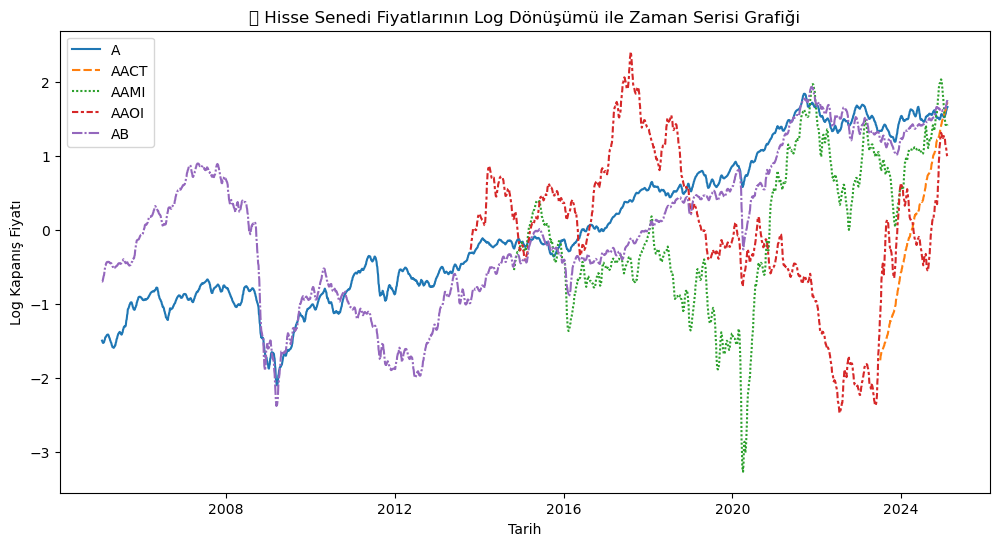

Tshfreh İçin Hazırlık TAMAMLANDI örnek : 
     timestamp station     value
13 2005-01-21       A -1.495717
14 2005-01-24       A -1.505918
15 2005-01-25       A -1.512018
16 2005-01-26       A -1.517257
17 2005-01-27       A -1.520350


Feature Extraction: 100%|██████████| 20/20 [08:22<00:00, 25.12s/it]
c:\Users\Harun\miniconda3\envs\my_stock_env\lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['value__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


Pipeline tamamlandı, özellikler kaydedildi!


In [12]:
data_close_for_model = pd.read_csv('./data/data_close_for_model.csv', parse_dates=True, index_col=0)


df_features = pipeline.fit_transform(data_close_for_model)

print("Pipeline tamamlandı, özellikler kaydedildi!")

In [15]:
df_features.to_csv(f'./data/features.csv')
print("Pipeline tamamlandı, özellikler kaydedildi!")

Pipeline tamamlandı, özellikler kaydedildi!


#  **Sektör Etiketleme ve Dağılım Analizi**

Bu adımda, **çıkarılan özelliklere sektör bilgisi eklenerek veri etiketlenir** ve sektörlerin dengeli olup olmadığı analiz edilir.

---

##  **Özellik Veri Çerçevesinin (df_features) Hazırlanması**
- **Pipeline sonrası elde edilen özellik verisi** `df_features` içerisinde saklanmaktadır.
- **İndeks sıfırlanarak (reset_index)**, hisse senedi sembolleri bağımsız bir sütuna dönüştürülür.

---

##  **Sektör Haritalama (Mapping)**
- **Üç sektör** için bir **sektör kodu eşleme sözlüğü** oluşturulur:

  | Sektör          | Kod |
  |----------------|-----|
  | Finans (financials) | **F** |
  | Sağlık (healthcare) | **H** |
  | Teknoloji (technology) | **T** |

- **Her sektördeki hisseler ayrı ayrı sektör kodlarıyla eşleştirilir** ve `ticker_sector_map` sözlüğü oluşturulur.

---

##  **Sektör Bilgisinin Veri Çerçevesine Eklenmesi**
- **Hisse senedi sembolleri (`index` sütunu)** kullanılarak, sektör bilgisi **map() fonksiyonu ile `sector` sütununa atanır**.

---

##  **Sektör Dağılımının Kontrolü**
- `value_counts()` fonksiyonu ile **sektör dağılımı analiz edilir**.
- **Her sektörde kaç adet hisse bulunduğu ekrana yazdırılır**.
- Bu adım, **verinin dengeli olup olmadığını anlamak için kritik bir aşamadır**.

---

**Sektör bilgileri başarıyla eklendi ve veri analize hazır hale getirildi!** 

In [16]:
df_features=df_features.reset_index()


sector_mapping = {
    "financials": "F",
    "healthcare": "H",
    "technology": "T"
}


ticker_sector_map = {}  

for ticker in financials_tickers:
    ticker_sector_map[ticker] = "F"
for ticker in healthcare_tickers:
    ticker_sector_map[ticker] = "H"
for ticker in technology_tickers:
    ticker_sector_map[ticker] = "T"



df_features["sector"] = df_features["index"].map(ticker_sector_map)

df_features["sector"].value_counts() 

sector
T    487
F    485
H    482
Name: count, dtype: int64

#  **Sektör Etiketleme ve Veri Hazırlama**

Bu adımda, **önceden çıkarılmış özellikler yüklenerek** sektör bilgisi eklenir ve makine öğrenimi için **bağımsız (X) ve bağımlı (y) değişkenler** ayrılır.

---

##  **Özelliklerin Yüklenmesi**
- **Önceden kaydedilen özellik veri çerçevesi** `features_with_sectors.csv` dosyasından okunur.
- **İlk sütun indeks olarak belirlenir** (`index_col=0`).
- **İndeks sıfırlanarak (reset_index)** hisse senedi isimleri bağımsız bir sütuna dönüştürülür.
- **"index" sütunu "Hisse" olarak yeniden adlandırılır**.

---

##  **Bağımsız ve Bağımlı Değişkenlerin Ayrılması**
- **Bağımsız değişkenler (`X`)**: **"sector"** ve **"Hisse"** sütunu hariç tüm özellikleri içerir.
- **Bağımlı değişken (`y`)**: **"sector"** sütunu (etiket olarak kullanılır).

---

##  **Sektör Etiketleme (Label Encoding)**
- **LabelEncoder** kullanılarak **sektör isimleri sayısal değerlere dönüştürülür**.
- **Makine öğrenimi algoritmalarının anlayabileceği şekilde etiketleme** sağlanır.

---

**Veri başarıyla hazırlandı ve sektör etiketleri sayısal değerlere dönüştürüldü!** 

In [19]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df=df_features


df.reset_index(inplace=True)
df.rename(columns={"index": "Hisse"}, inplace=True)



X = df.drop(columns=["sector","Hisse"])  
y = df["sector"]  

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#  **Veri Setinin Boyutlarının Kontrolü**

Bu adımda, **oluşturulan veri çerçevesinin (df) boyutları** incelenerek kaç adet hisse senedi ve kaç adet özellik bulunduğu analiz edilir.

---

##  **Veri Setinin Boyutu**
- `df.shape` komutu ile **veri çerçevesinin satır ve sütun sayısı** görüntülenir.
- **Satır sayısı**: Veri setinde kaç farklı **hisse senedi** bulunduğunu gösterir.
- **Sütun sayısı**: **Çıkarılan özelliklerin sayısını** gösterir (sektör ve hisse sütunları hariç).

---

##  **Örnek Senaryo**
Eğer çıktı `(1500, 350)` gibi bir değer döndürürse:
- **1500 farklı hisse senedi** için veri bulunmaktadır.
- **350 farklı özellik** çıkarılmıştır.

---

**Veri setinin boyutları başarıyla kontrol edildi!** 

In [21]:
df.shape 

(1454, 780)

#  **Recursive Feature Elimination (RFE) ile Özellik Seçimi**

Bu adımda, **Recursive Feature Elimination (RFE)** yöntemi kullanılarak **en önemli 30 özellik** seçilecektir. Bu işlem, gereksiz veya düşük etkili özellikleri eleyerek modelin daha iyi genelleştirme yapmasını sağlar.

---

##  **Eğitim ve Test Verilerinin Ayrılması**
- **Bağımsız değişkenler (`X`)** ve **etiketlenmiş bağımlı değişken (`y_encoded`)** eğitim ve test kümelerine ayrılır.
- **Test seti oranı**: %20 (**test_size=0.2**).
- **Rastgelelik kontrolü**: **random_state=42** ile tekrar üretilebilirlik sağlanır.

---

##  **Random Forest ile Recursive Feature Elimination (RFE)**
- **100 ağaçtan oluşan bir Random Forest modeli** oluşturulur.
- **RFE algoritması**, Random Forest modelini kullanarak **en önemli 30 özelliği seçmek üzere eğitilir**.
- **Adım boyutu (%10)** olarak belirlenmiştir (**step=0.1**).

**Çıktı:**
- Seçilen özelliklerin sayısı: **30**.
- Seçilen özellikler ekrana yazdırılır.

---

##  **Özellik Önem Düzeylerinin Görselleştirilmesi**
- Seçilen özelliklerin **önem değerleri** **barplot grafiği** ile gösterilir.
- **En önemli özellikler** üst sıralarda yer alır.
- **Grafik özellikleri**:
  - X ekseni: **Özellik önemi skorları**.
  - Y ekseni: **Özellik isimleri**.
  - **Özellikler en önemliden en önemsize sıralanarak** gösterilir.

---

##  **Seçilen Özelliklerin Kaydedilmesi**
- Seçilen **30 önemli özellik**, `selected_features_rfe.csv` dosyasına kaydedilir.
- Kullanıcıya **başarıyla kaydedildiğine dair bilgi mesajı gösterilir**.

---

**Özellik seçimi tamamlandı ve en önemli 30 özellik başarıyla kaydedildi!** 

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=30,
    step=0.1)

🎯 RFE ile Seçilen 30 Özellik: Index(['value__last_location_of_maximum', 'value__first_location_of_maximum',
       'value__sum_of_reoccurring_data_points', 'value__number_peaks__n_1',
       'value__ar_coefficient__coeff_1__k_10',
       'value__ar_coefficient__coeff_2__k_10',
       'value__ar_coefficient__coeff_7__k_10',
       'value__ar_coefficient__coeff_8__k_10',
       'value__ar_coefficient__coeff_10__k_10',
       'value__change_quantiles__f_agg_"mean"__isabs_False__qh_0.6__ql_0.4',
       'value__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.4',
       'value__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.6',
       'value__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.8',
       'value__fft_coefficient__attr_"real"__coeff_7',
       'value__fft_coefficient__attr_"real"__coeff_11',
       'value__fft_coefficient__attr_"real"__coeff_20',
       'value__fft_coefficient__attr_"real"__coeff_24',
       'value__fft_coefficient__attr_"real"__coef

<Figure size 1200x600 with 0 Axes>

C:\Users\Harun\AppData\Local\Temp\ipykernel_8836\2161039976.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rfe.estimator_.feature_importances_, y=selected_features_rfe, palette="coolwarm")


<Axes: ylabel='None'>

Text(0.5, 0, 'Özellik Önemi')

Text(0, 0.5, 'Özellik Adı')

Text(0.5, 1.0, 'RFE ile Seçilen 30 Özellik')

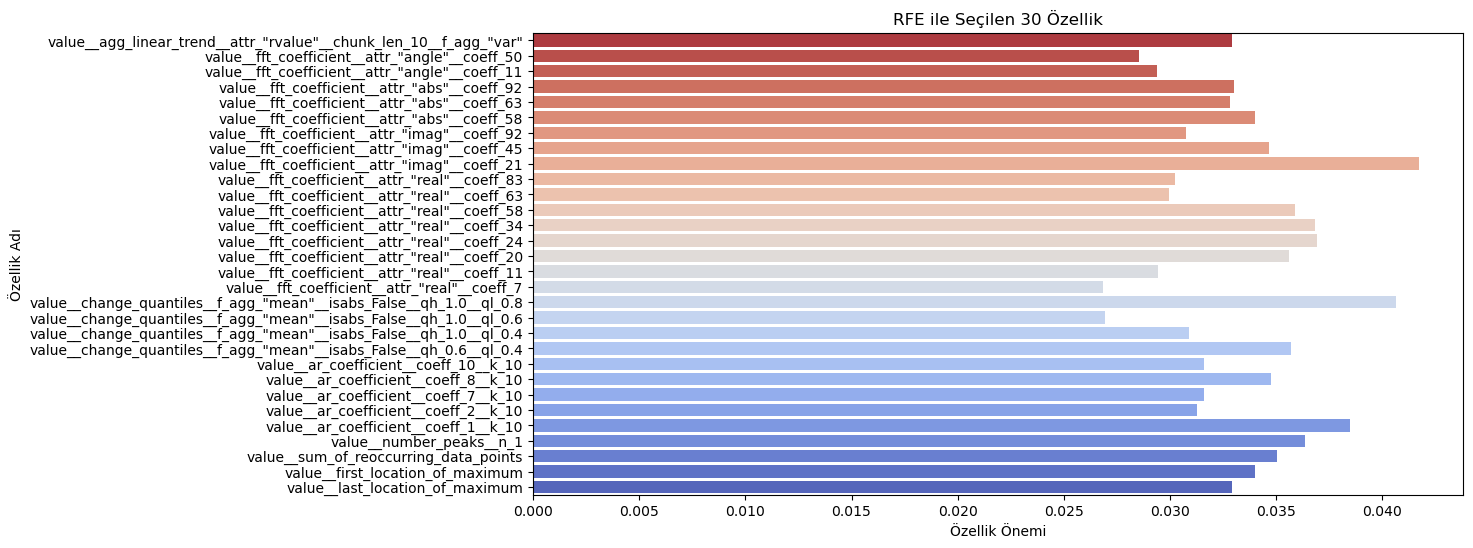

RFE ile özellikler seçildi  ve 'selected_features_rfe.csv' olarak kaydedildi!


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)

rfe = RFE(estimator=rf, n_features_to_select=30 ,step=0.1)  
rfe.fit(X_train, y_train)

selected_features_rfe = X_train.columns[rfe.support_]
print(f"🎯 RFE ile Seçilen {len(selected_features_rfe)} Özellik: {selected_features_rfe}")

plt.figure(figsize=(12, 6))
sns.barplot(x=rfe.estimator_.feature_importances_, y=selected_features_rfe, palette="coolwarm")
plt.xlabel("Özellik Önemi")
plt.ylabel("Özellik Adı")
plt.title(f"RFE ile Seçilen {len(selected_features_rfe)} Özellik")
plt.gca().invert_yaxis()
plt.show()


pd.Series(selected_features_rfe).to_csv("./data/selected_features_rfe.csv", index=False)
print("RFE ile özellikler seçildi  ve 'selected_features_rfe.csv' olarak kaydedildi!")

#  **Seçilen Özelliklerle Model Eğitimi ve Hiperparametre Optimizasyonu**

Bu adımda, **Recursive Feature Elimination (RFE) ile belirlenen 30 önemli özellik** kullanılarak **makine öğrenimi modelleri eğitilecek ve hiperparametre optimizasyonu gerçekleştirilecektir**.

---

##  **Seçilen Özelliklerin Kullanılması**
- **Önceki adımda seçilen 30 özellik** `X[selected_features_rfe]` ile filtrelenerek yeni bir veri seti oluşturulur.
- **Gereksiz özellikler kaldırılarak modelin daha verimli çalışması sağlanır.**

---

##  **Eğitim ve Test Verisinin Yeniden Bölünmesi**
- **Bağımsız değişkenler (`X_selected`)** ve **etiketlenmiş bağımlı değişken (`y_encoded`)**, eğitim ve test kümelerine ayrılır.
- **Test seti oranı**: %20 (**test_size=0.2**).
- **Rastgelelik kontrolü**: **random_state=42** ile tekrar üretilebilirlik sağlanır.

---

##  **Kullanılacak Makine Öğrenimi Modelleri**
Bu adımda iki farklı model eğitilecek:

1. **Random Forest (RF)**
   - Karar ağaçlarından oluşan **ensembling (topluluk) modeli**.
   - Özellikle **yüksek boyutlu veri setlerinde** iyi performans gösterir.

2. **CatBoost (Gradient Boosting Tabanlı)**
   - **Kategori bazlı verilerle daha iyi çalışan** bir gradient boosting algoritması.
   - **Özellikle ağaç tabanlı modellerde** daha güçlü bir alternatif.

---

##  **Hiperparametre Grid Arama (Grid Search)**
Her model için farklı hiperparametre kombinasyonları **optimize edilecektir**:

###  **Random Forest Hiperparametreleri**
- `n_estimators`: 50, 100, 200 (Ağaç sayısı)
- `max_depth`: 5, 10, None (Ağaçların maksimum derinliği)

###  **CatBoost Hiperparametreleri**
- `iterations`: 50, 100, 200 (İterasyon sayısı)
- `learning_rate`: 0.01, 0.1, 0.2 (Öğrenme oranı)
- `depth`: 4, 6, 10 (Ağaç derinliği)

Bu hiperparametreler **Grid Search ile en iyi kombinasyonu bulmak için** optimize edilecektir.

---

**Özellik seçimi tamamlandı, modeller ve hiperparametre aramaları için yapılandırmalar hazır!** 

In [23]:
X_selected = X[selected_features_rfe]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)

models = {
    "RandomForest": RandomForestClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

param_grid = {
    "RandomForest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [5, 10, None]
    },
  
    "CatBoost": {
        "iterations": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "depth": [4, 6, 10]
    }
}



#  **Model Eğitimi ve Hiperparametre Optimizasyonu (Grid Search)**

Bu adımda, **tanımlanan modellerin en iyi hiperparametre kombinasyonlarını bulmak için Grid Search uygulanmaktadır**.

---

##  **Model Optimizasyonu İçin Döngü**
- `models` sözlüğünde tanımlanan **RandomForest** ve **CatBoost** modelleri sırasıyla optimize edilir.
- **Döngü ile her model üzerinde Grid Search uygulanır**.

**İşleyiş Adımları:**
1. **Model ismi ekrana yazdırılır**, böylece hangi modelin test edildiği takip edilir.
2. **GridSearchCV** kullanılarak:
   - Modelin **hiperparametre kombinasyonları** tek tek denenir.
   - **Çapraz doğrulama (`cv=3`)** ile modelin genelleme başarısı test edilir.
   - **Başarı metriği (scoring)** olarak **doğruluk skoru (`accuracy`)** kullanılır.
   - **Paralel işlem (n_jobs=-1)** ile hızlandırılmış eğitim sağlanır.
   - **Aşama aşama çıktı alınması (`verbose=1`)** ile süreç takip edilir.
3. **Model eğitilir ve en iyi parametreler bulunur**.
4. **Grid Search sonucu en iyi model (`best_estimator_`) alınarak `best_models` sözlüğüne eklenir**.
5. **Her modelin en iyi hiperparametre kombinasyonu ekrana yazdırılır**.

---

##  **Çıktı Örneği**
Eğer çıktı şu şekilde olursa:
```bash
 Şu an test ediliyor: RandomForest
Fitting 3 folds for each of 9 candidates, totalling 27 fits
En iyi model RandomForest: {'max_depth': 10, 'n_estimators': 100}

 Şu an test ediliyor: CatBoost
Fitting 3 folds for each of 27 candidates, totalling 81 fits
En iyi model CatBoost: {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}


In [24]:
best_models = {}

for name, model in models.items():
    print(f"🚀 Şu an test ediliyor: {name}")
    
    grid_search = GridSearchCV(model, param_grid[name], cv=3, scoring="accuracy", n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    
    print(f"✅ En iyi model {name}: {grid_search.best_params_}")


🚀 Şu an test ediliyor: RandomForest
Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

✅ En iyi model RandomForest: {'max_depth': 10, 'n_estimators': 200}
🚀 Şu an test ediliyor: CatBoost
Fitting 3 folds for each of 27 candidates, totalling 81 fits


c:\Users\Harun\miniconda3\envs\my_stock_env\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
7 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Harun\miniconda3\envs\my_stock_env\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Harun\miniconda3\envs\my_stock_env\lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "c:\Users\Har

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001F0FC53D400>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 10], 'iterations': [50, 100, 200],
                         'learning_rate': [0.01, 0.1, 0.2]},
             scoring='accuracy', verbose=1)

✅ En iyi model CatBoost: {'depth': 6, 'iterations': 100, 'learning_rate': 0.2}


#  **Eğitilen Modellerin Test Edilmesi ve Performans Değerlendirmesi**

Bu adımda, **Grid Search ile en iyi hiperparametrelere sahip modellerin** test veri kümesi üzerinde performansı ölçülmektedir.

---

##  **Test Süreci**
- **Eğitilmiş modeller (`best_models` sözlüğü içinde bulunan en iyi modeller)** sırasıyla test edilir.
- **Bağımsız değişkenler (`X_test`)** modele verilerek **tahminler (`y_pred`)** oluşturulur.

---

##  **Model Başarısının Değerlendirilmesi**
Her model için aşağıdaki değerlendirmeler yapılır:

1. **Doğruluk Skoru (Accuracy)**
   - Modelin **doğru tahmin oranı hesaplanır**.
   - `accuracy_score(y_test, y_pred)` ile ölçülerek **4 ondalık basamağa yuvarlanır**.

2. **Sınıflandırma Raporu (Classification Report)**
   - Modelin **her sınıf için hassasiyet (precision), duyarlılık (recall), F1 skoru** ve destek (support) değerleri hesaplanır.
   - `classification_report(y_test, y_pred)` ile detaylı metrikler ekrana yazdırılır.

---

##  **Sonuç**
- **Her modelin doğruluk skoru ve sınıflandırma raporu hesaplandı**.
- **Modelin genel performansı ve sınıflara göre başarımı analiz edildi**.
- **Bu adımın sonunda en iyi model seçilebilir ve gerektiğinde iyileştirme yapılabilir**.

**Model değerlendirmesi başarıyla tamamlandı!** 


In [25]:
for name, model in best_models.items():
    print(f"Model Test Ediliyor: {name}")
    y_pred = model.predict(X_test)
    
    print(f"{name} Doğruluk: {accuracy_score(y_test, y_pred):.4f}")
    print("Sınıflandırma Raporu:")
    print(classification_report(y_test, y_pred))


Model Test Ediliyor: RandomForest
RandomForest Doğruluk: 0.6186
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        91
           1       0.60      0.64      0.62       100
           2       0.52      0.51      0.52       100

    accuracy                           0.62       291
   macro avg       0.62      0.62      0.62       291
weighted avg       0.62      0.62      0.62       291

Model Test Ediliyor: CatBoost
CatBoost Doğruluk: 0.5876
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        91
           1       0.57      0.52      0.54       100
           2       0.50      0.55      0.52       100

    accuracy                           0.59       291
   macro avg       0.60      0.59      0.59       291
weighted avg       0.59      0.59      0.59       291



#  **Yeni Sektör (Gayrimenkul) Verisinin İndirilmesi ve Analizi**

Bu adımda, **modeli eğitirken kullanmadığımız bir sektör olan "Gayrimenkul" (real-estate) sektöründen hisse senedi fiyat verileri çekilmektedir**. 

---

##  **Yeni Sektörden Hisse Senedi Seçimi**
- **Gayrimenkul sektöründen (real-estate) 200 hisse senedi sembolü** seçilir.
- `select_tickers_sybmol("real-estate", 200)` fonksiyonu kullanılarak hisse sembolleri çekilir.

---

##  **Hisse Senedi Fiyatlarının İndirilmesi**
- Seçilen hisseler için **Yahoo Finance API** kullanılarak **2005 yılından itibaren tarihsel kapanış fiyatları** indirilir.
- `download_stock_prices_yfinance()` fonksiyonu ile veriler alınır.

---

##  **Yeni Sektör Üzerinde Modeli Test Etme Amacı**
Bu adımın temel amacı, **modeli eğitirken kullanılmamış bir sektördeki hisselerin hangi sektöre daha yakın olduğunu incelemektir**. 

**Hedefler:**
1. **Eğitilmiş modeli kullanarak gayrimenkul sektöründeki hisselerin hangi sektöre daha yakın olduğunu tahmin etmek**.
2. **Bu sektörün finans, sağlık veya teknoloji sektörlerinden hangisine daha çok benzediğini analiz etmek**.
3. **Özellik uzayındaki benzerlikleri değerlendirerek modelin genelleme yeteneğini gözlemlemek**.

---

**Yeni sektörün verisi başarıyla indirildi!** 

In [26]:
real_estate_tickers = select_tickers_sybmol("real-estate",200)
data_close_for_real_estate=download_stock_prices_yfinance(real_estate_tickers,stardate='2005-01-01')
data_close_for_real_estate.tail(3)

[*********************100%***********************]  200 of 200 completed


,Close_AAT,Close_ABR,Close_ACRE,Close_ADC,Close_AGNC,Close_AHH,Close_AHR,Close_AIV,Close_AKR,Close_ALEX,...,Close_VICI,Close_VNO,Close_VRE,Close_VTMX,Close_VTR,Close_WELL,Close_WPC,Close_WSR,Close_WY,Close_XHR
Date,,,,,,,,,,,,,,,,,,,,,
2025-02-03,24.120001,13.5000,5.68,72.879997,9.950,9.66,28.860001,8.94,22.790001,17.969999,...,29.790001,42.119999,15.93,26.629999,61.360001,140.380005,55.430000,13.28,30.750000,14.610
2025-02-04,24.020000,13.7300,5.85,72.430000,10.070,9.68,28.620001,8.95,22.730000,17.900000,...,29.799999,42.220001,15.85,26.809999,60.189999,138.860001,55.169998,13.40,30.139999,14.620
2025-02-05,22.480000,13.7596,5.87,72.709999,10.078,9.65,28.895000,8.95,22.809999,18.014999,...,29.835100,41.549999,15.83,26.799999,60.299999,139.649994,55.310001,13.51,30.129999,14.534


#  **Gayrimenkul Sektörü İçin Özellik Çıkarma ve Eksik Verilerin İşlenmesi**

Bu adımda, **daha önce eğitime dahil edilmeyen "Gayrimenkul" (real-estate) sektörüne ait hisse senedi verileri** **pipeline üzerinden geçirilerek özellik çıkarımı yapılmaktadır**.

---

##  **Pipeline Kullanarak Özellik Çıkarma**
- **Gayrimenkul sektörüne ait hisse fiyat verileri**, daha önce oluşturulan **pipeline modeli** ile işlenir.
- **Pipeline adımları sırasıyla uygulanır:**
  1. **Basit Hareketli Ortalama (SMA) hesaplanır**.
  2. **Log dönüşümü uygulanır**.
  3. **Veriler ölçeklenir**.
  4. **TSFresh için veri hazırlanır ve zaman serisi özellikleri çıkarılır**.
  5. **Son olarak, TSFresh kullanılarak veri çerçevesi özellik formatına dönüştürülür**.

**Sonuç:** **"df_test_features_for_real_estate"** değişkeni, gayrimenkul sektörüne ait hisselerin çıkarılmış özelliklerini içerir.

---

##  **Eksik Verilerin İşlenmesi**
- **TSFresh ile özellik çıkarımı yapıldıktan sonra bazı sütunlarda eksik veriler (NaN) oluşabilir**.
- `impute()` fonksiyonu kullanılarak **bu eksik veriler doldurulur** ve veri analize hazır hale getirilir.

**Bu işlem, modelin eksik değerlerden etkilenmemesini sağlar ve modelin tüm girdileri değerlendirebilmesine olanak tanır**.

---

**Gayrimenkul sektörüne ait hisseler için özellik çıkarımı ve eksik veri işlemleri başarıyla tamamlandı!**  

C:\Users\Harun\AppData\Local\Temp\ipykernel_8836\4154792358.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"HisseSenedi_Log_{col}"] = np.log(df[col])
C:\Users\Harun\AppData\Local\Temp\ipykernel_8836\4154792358.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"HisseSenedi_Log_{col}"] = np.log(df[col])
C:\Users\Harun\AppData\Local\Temp\ipykernel_8836\4154792358.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5056 entries, 2005-01-03 to 2025-02-05
Columns: 200 entries, AAT to XHR
dtypes: float64(200)
memory usage: 7.8 MB


c:\Users\Harun\miniconda3\envs\my_stock_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


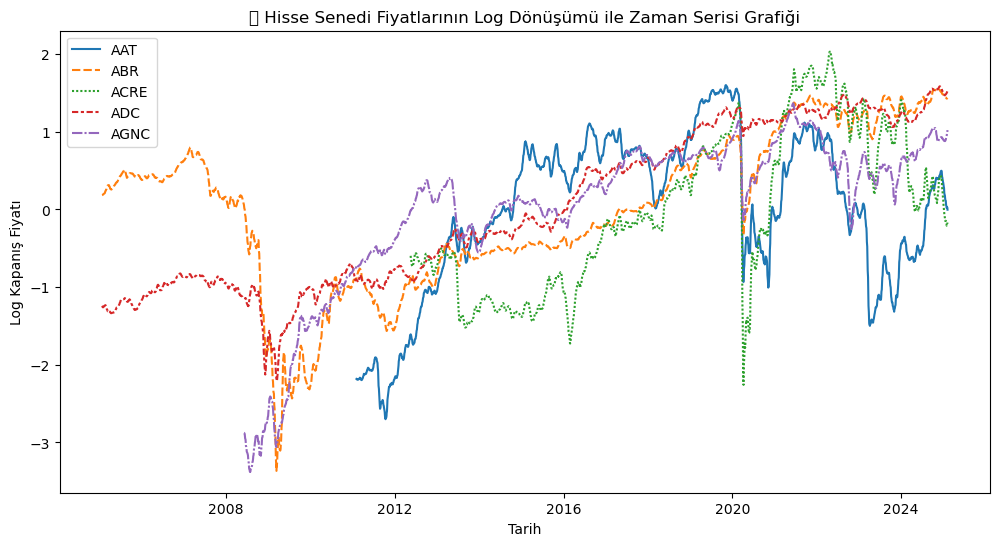

Tshfreh İçin Hazırlık TAMAMLANDI örnek : 
       timestamp station     value
1532 2011-02-02     AAT -2.181580
1533 2011-02-03     AAT -2.182419
1534 2011-02-04     AAT -2.185414
1535 2011-02-07     AAT -2.187932
1536 2011-02-08     AAT -2.191533


Feature Extraction: 100%|██████████| 20/20 [01:21<00:00,  4.05s/it]
c:\Users\Harun\miniconda3\envs\my_stock_env\lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['value__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


In [43]:
df_test_features_for_real_estate = pipeline.fit_transform(data_close_for_real_estate)

df_test_features_for_real_estate = impute(df_test_features_for_real_estate)

In [46]:
df_test_features_for_real_estate.to_csv(f'./data/features_for_real_estate.csv')
print("Real Estate için başarılı bir şekilde özellikleri dosya yoluna (.data/features_for_real_estate.csv)  kaydedildi")

Real Estate için başarılı bir şekilde özellikleri dosya yoluna (.data/features_for_real_estate.csv)  kaydedildi


#  **Gayrimenkul Sektöründeki Hisselerin Tahmini ve Analizi**

Bu adımda, **daha önce modele dahil edilmeyen "Gayrimenkul" (real-estate) sektörüne ait hisselerin hangi sektöre daha çok benzediğini analiz etmek için eğitilmiş model kullanılarak tahminler yapılmaktadır**.

---

##  **Özellik Seçimi**
- **Daha önce RFE yöntemi ile belirlenen en iyi 30 özellik**, gayrimenkul sektörüne ait hisse verilerinden seçilir.
- `X_real_estate` değişkeni, **yalnızca seçilen özellikleri içeren yeni bir veri çerçevesi** oluşturur.

---

##  **Eğitilmiş Model ile Tahmin Yapma**
- **Gayrimenkul sektörüne ait hisselerin özellikleri**, daha önce eğitilmiş **CatBoost modeli** kullanılarak tahmin edilir.
- `best_models["CatBoost"].predict(X_real_estate)` ile **her hisse senedinin ait olduğu sektör tahmin edilir**.

---

##  **Sayısal Sektör Etiketlerinin Geri Dönüştürülmesi**
- **Model çıktısı sayısal etiketler olarak gelir**.
- `label_encoder.inverse_transform(predicted_sectors)` ile **sayısal etiketler, orijinal sektör isimlerine dönüştürülür**.
- **Sonuç: Her hisse senedi için hangi sektöre benzediği belirlenmiş olur**.

---

##  **Sonuçların Görselleştirilmesi ve Kaydedilmesi**
- **Tahmin edilen sektör bilgileri ve hisse isimleri** bir **veri çerçevesine** eklenir.
- `real_estate_results.csv` dosyasına kaydedilerek **gelecekteki analizler için saklanır**.
- İlk **5 tahmin sonucu ekrana yazdırılarak modelin performansı incelenir**.

---

##  **Bu Analizin Amacı**
- **Gayrimenkul sektörüne ait hisseler, finans, sağlık veya teknoloji sektörlerinden hangisine daha yakın?**
- **Bu sektör, daha çok hangi sektörlerle benzer özellikler taşıyor?**
- **Model, hiç görmediği bir sektör için başarılı tahminler yapabiliyor mu?**

Bu analiz sayesinde **sektörler arasındaki benzerlikleri anlamak ve modelin genelleme yeteneğini ölçmek** mümkün hale gelecektir.

---

**Gayrimenkul sektörüne ait hisselerin sektör tahminleri başarıyla tamamlandı ve kaydedildi!** 

In [52]:
df_test_features_for_real_estate=pd.read_csv(f'./data/features_for_real_estate.csv')
X_real_estate = df_test_features_for_real_estate[selected_features_rfe]

predicted_sectors = best_models["RandomForest"].predict(X_real_estate)

predicted_labels = label_encoder.inverse_transform(predicted_sectors)

real_estate_results = pd.DataFrame({ "Tahmin Edilen Sektör": predicted_labels})

df_test_features_for_real_estate = df_test_features_for_real_estate.reset_index()  

real_estate_results = pd.DataFrame({
    "Hisse": df_test_features_for_real_estate["index"],  
    "Tahmin Edilen Sektör": predicted_labels 
})

real_estate_results.to_csv(f'./data/real_estate_results.csv', index=False)

print("İlk 5 Tahmin Sonucu:")
print(real_estate_results.head(5))

İlk 5 Tahmin Sonucu:
   Hisse Tahmin Edilen Sektör
0      0                    H
1      1                    F
2      2                    H
3      3                    F
4      4                    T


#  **Gayrimenkul Sektörü Hisselerinin Tahmin Edilen Sektör Dağılımı**

Bu adımda, **eğitilmiş model tarafından tahmin edilen sektörlerin dağılımı incelenerek görselleştirilir**.

---

##  **Sektör Dağılımının Hesaplanması**
- **Modelin tahmin ettiği sektörler** sayılarak dağılım belirlenir.
- `value_counts()` fonksiyonu ile **her sektör için kaç hisse tahmin edildiği** hesaplanır.

---

##  **Sonuçların Pasta Grafiği ile Görselleştirilmesi**
- **Matplotlib ve Seaborn kullanılarak** tahmin edilen sektörlerin pasta grafiği çizilir.
- **Her sektörün toplam içindeki yüzdesi (`autopct="%1.1f%%"`) gösterilir**.
- **Renk paleti olarak "viridis" kullanılmıştır**.

---

##  **Sektör Dağılımı İçin Ek Bilgi Gösterimi**
- **Grafiğin üzerine ek metin olarak sektörlerin sayısal değerleri eklenmiştir**.
- **Metin kutusu (`bbox`) kullanılarak bilgi kutusu daha okunabilir hale getirilmiştir**.

---

##  **Bu Analizin Amacı**
- **Gayrimenkul sektörüne ait hisseler hangi sektöre daha çok benziyor?**
- **Model, gayrimenkul hisselerini belirli bir sektöre mi yönlendiriyor, yoksa dağılım dengeli mi?**
- **Sektörler arasında ne tür benzerlikler var?**

Bu analiz, **sektörler arası geçişkenliği ve modelin farklı sektörleri ne kadar ayırt edebildiğini anlamak için kritik bir adımdır**.

---

**Sektör dağılımı başarıyla analiz edildi ve görselleştirildi!** 

<Figure size 800x800 with 0 Axes>

<Axes: ylabel='count'>

Text(1.2, 1.2, 'F → 104 \nH → 75 \nT → 21 ')

Text(0.5, 1.0, '📊 Real-Estate Hisseleri İçin Tahmin Edilen Sektörler')

c:\Users\Harun\miniconda3\envs\my_stock_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


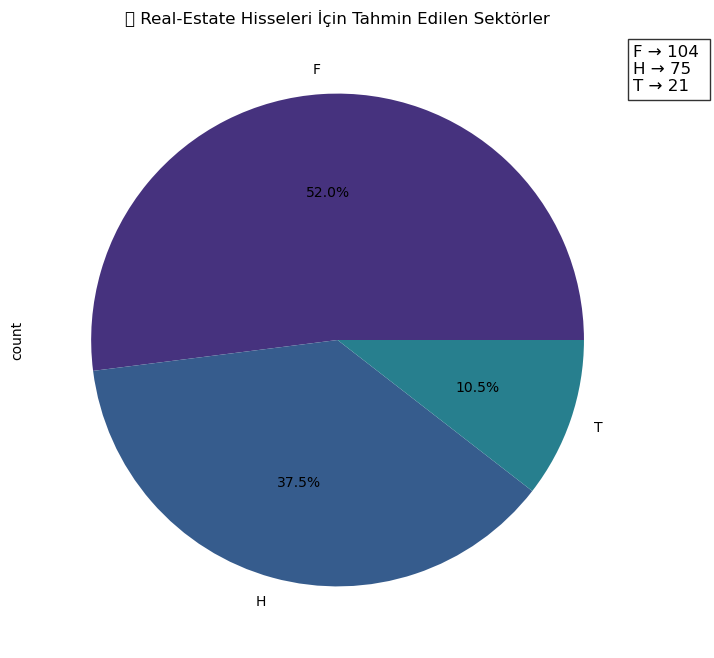

In [51]:
sector_counts = real_estate_results["Tahmin Edilen Sektör"].value_counts()

plt.figure(figsize=(8, 8))
sector_counts.plot(kind="pie", autopct="%1.1f%%", colors=sns.color_palette("viridis"))

info_text = "\n".join([f"{sector} → {count} " for sector, count in sector_counts.items()])
plt.text(1.2, 1.2, info_text, fontsize=12, ha="left", va="top", bbox=dict(facecolor='white', alpha=0.8))

plt.title("📊 Real-Estate Hisseleri İçin Tahmin Edilen Sektörler")
plt.show()

#  **Gayrimenkul Sektöründeki Hisselerin Tahmin Edilen Sektör Dağılımı - Sonuçlar ve Yorumlar**

Bu analizde, **eğitilmiş model ile gayrimenkul (real-estate) sektörüne ait hisselerin hangi sektöre daha çok benzediği tahmin edilmiştir**. Sonuçlar pasta grafiği ve sayısal analiz ile görselleştirilmiştir.

---

##  **Sonuçların Özeti**
- **Finans sektörü (F)**: **104 hisse senedi (%52.0)**  
- **Sağlık sektörü (H)**: **75 hisse senedi (%37.5)**  
- **Teknoloji sektörü (T)**: **21 hisse senedi (%10.5)**  

Bu dağılım, modelin **gayrimenkul hisselerini en çok finans sektörüne benzettiğini** gösteriyor.

---

##  **Çıkarımlar ve Yorumlar**
1. **Finans Sektörü ile Yüksek Benzerlik**
   - **Gayrimenkul hisselerinin %52.0’i finans sektörüne atanmıştır**.
   - Bu durum, **gayrimenkul ve finans sektörleri arasında güçlü bir ilişki olduğunu gösteriyor**.
   - Gerçek dünyada da gayrimenkul şirketleri genellikle finans sektörüyle iç içedir (bankalar, mortgage şirketleri vb.).

2. **Sağlık Sektörü ile Orta Düzeyde Benzerlik**
   - **%37.5’lık oran ile sağlık sektörü ikinci sırada yer alıyor**.
   - Bu durum, modelin bazı gayrimenkul hisselerini **sağlık sektörüne benzettiğini gösteriyor**.
   - Büyük sağlık kompleksleri, hastaneler ve sağlık yatırımları gayrimenkul ile ilişkili olabilir.

3. **Teknoloji Sektörü ile Düşük Benzerlik**
   - **%10.5 oranında tahmin edilen teknoloji sektörü, en düşük eşleşmeyi gösteriyor**.
   - Gayrimenkul sektörünün **teknolojiyle doğrudan ilişkili olmadığı** sonucuna varılabilir.
   - Model, yalnızca **bazı teknoloji odaklı gayrimenkul şirketlerini** bu sektöre yakın bulmuş olabilir.

---

##  **Eksik Olan ve İyileştirilebilecek Noktalar**
- **Model, gayrimenkul sektörüne özgü yeni bir etiket ile eğitilmediğinden**, en yakın benzer sektörlere tahmin yapmaktadır.
- **Ek veri eklenerek** modelin gayrimenkul sektörü hakkında daha doğru tahminler yapması sağlanabilir.
- **Daha fazla sektör eklenerek genelleme yeteneği artırılabilir**.

---

**Model, gayrimenkul hisselerini en çok finans sektörüne yakın olarak sınıflandırmıştır. Bu, sektörler arasındaki doğal ilişkileri doğrulayan bir sonuçtur!** 

#  **KAYNAKÇA**

Bu projede kullanılan yöntemler ve kodlar, aşağıdaki kaynaklardan faydalanılarak geliştirilmiştir:

---

##  **Ders Kaynağı ve Eğitmen Materyalleri**
- **Milli Teknoloji Akademisi**  
  - **Hocam, yüklediğiniz içerikler ve ders anlatımında kullandığınız materyallerden yararlandım.**  
  - [https://www.milliteknolojiakademisi.gov.tr/](https://www.milliteknolojiakademisi.gov.tr/)  

- **ChatGPT**  
  - **Markdown dosyalarının yazılmasında ve Pipeline kullanımında ChatGPT’den yardım aldım.**  

---

##  **Python ile Finansal Veri Analizi ve Web Scraping**
- **Yahoo Finance API Dokümantasyonu**  
  - [https://pypi.org/project/yfinance/](https://pypi.org/project/yfinance/)  
  - Hisse senedi fiyatlarını çekmek için kullanılan `yfinance` kütüphanesi hakkında detaylı bilgi.

- **BeautifulSoup ve Requests ile Web Scraping**  
  - [https://www.crummy.com/software/BeautifulSoup/bs4/doc/](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)  
  - Hisse senedi sektörlerini ve ilgili bilgileri web sitelerinden çekmek için kullanılan `BeautifulSoup`.

---

##  **Veri İşleme ve Görselleştirme**
- **Pandas ve NumPy ile Veri Manipülasyonu**  
  - [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)  
  - Veri çerçevesi işlemleri, `read_csv()`, `dropna()`, `groupby()` gibi fonksiyonlar için detaylı dökümantasyon.

- **Matplotlib ve Seaborn ile Görselleştirme**  
  - [https://matplotlib.org/stable/contents.html](https://matplotlib.org/stable/contents.html)  
  - [https://seaborn.pydata.org/](https://seaborn.pydata.org/)  
  - Pasta grafikleri, bar grafikleri ve veri görselleştirme teknikleri hakkında detaylı kaynaklar.

---

##  **Makine Öğrenimi ve Özellik Seçimi**
- **Scikit-learn ile Makine Öğrenimi Algoritmaları**  
  - [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)  
  - `RandomForestClassifier`, `train_test_split`, `GridSearchCV`, `LabelEncoder`, `RFE` gibi kullanılan algoritma ve fonksiyonlar için resmi dökümantasyon.

- **CatBoost ile Gradient Boosting Algoritması**  
  - [https://catboost.ai/en/docs/](https://catboost.ai/en/docs/)  
  - CatBoost algoritmasının parametreleri ve optimizasyon teknikleri.

- **TSFresh ile Zaman Serisi Özellik Çıkarma**  
  - [https://tsfresh.readthedocs.io/en/latest/](https://tsfresh.readthedocs.io/en/latest/)  
  - Zaman serisi verilerinden otomatik özellik çıkarma ve `impute()` fonksiyonu ile eksik veri işleme.

---

##  **Model Değerlendirme ve Performans Analizi**
- **Scikit-learn Sınıflandırma ve Model Değerlendirme Metrikleri**  
  - [https://scikit-learn.org/stable/modules/model_evaluation.html](https://scikit-learn.org/stable/modules/model_evaluation.html)  
  - `accuracy_score()`, `classification_report()` ve model değerlendirme metrikleri için kaynak.

- **Feature Selection Techniques (Özellik Seçimi Teknikleri)**  
  - [https://scikit-learn.org/stable/modules/feature_selection.html](https://scikit-learn.org/stable/modules/feature_selection.html)  
  - `RFE` (Recursive Feature Elimination) yöntemi ile en önemli 30 özelliğin seçilmesi.

---

##  **Ekstra Öğrenme Kaynakları**
- **Veri Bilimi ve Makine Öğrenimi İçin Python**  
  - [https://realpython.com/](https://realpython.com/)  
  - Veri analizi, makine öğrenimi ve Python kütüphaneleri üzerine pratik eğitimler.

- **Kaggle - Finansal Veri Analizi ve Tahminleme Projeleri**  
  - [https://www.kaggle.com/](https://www.kaggle.com/)  
  - Finansal veri analizi, makine öğrenimi uygulamaları ve örnek projeler için geniş veri setleri.

---

**Bu kaynaklar, projede kullanılan tüm veri işleme, modelleme ve analiz tekniklerinin temelini oluşturmaktadır.** 